## Tutorial 1: First steps

Welcome to this tutorial.

# Importing libraries

Let's start by importing some libraries. If you have installed meltPT correctly, this should work!

In [1]:
from meltPT import *
import pyMelt as m
import matplotlib.pyplot as plt

# Reading data and initialising the Suite object

Start by importing data from your csv. In this case our data are stored in a file called "PF16_UT09DV04.csv". To keep this example simple, the input infile contains a single sample, UT09DV04, from Plank & Forsyth (2016).

In [2]:
s = Suite("PF16_UT09DV04.csv", src_FeIII_totFe=0.17)

You have now created an instance of meltPT's Suite class, containing the sample data. Data are stored in a pandas dataframe, which you can preview by typing:

In [3]:
print(s.data)

  Volc Field       Vent tephra/lava/MI      Sample       IGSN  Latitude  \
0       SCVF  Diamond V      tephra/MI  UT-09 DV04  TAP00001C   37.2571   

   Longitude       SiO2      TiO2      Al2O3  ...    U     Cr2O3  CO2  \
0  -113.6243  47.859824  1.866207  15.354245  ...  1.6  0.030856  0.0   

      Fe2O3  src_FeIII_totFe       NiO  CoO  Co  FeO_tot  Total  
0  2.104445             0.17  0.021263  0.0   0    11.28  100.0  

[1 rows x 49 columns]


# Backtrack compositions

The next step is backtracking the sample's composition. The aim here is to account for the effects of fractional crystallisation of olivine and estimate the sample's "primary" composition: i.e., its composition when it last equilibrated with the mantle. To do so, use the Suite's backtrack_compositions method. Here we have set the verbose flag to True, so program will print updates at each interation.

In [4]:
s.backtrack_compositions(Kd=0.3, verbose=True, target_Fo=0.9)

Backtracking sample UT-09 DV04 to primary composition:
    - 0.05% olivine added, melt Fo = 0.8498.
    - 0.10% olivine added, melt Fo = 0.8501.
    - 0.15% olivine added, melt Fo = 0.8503.
    - 0.20% olivine added, melt Fo = 0.8505.
    - 0.25% olivine added, melt Fo = 0.8507.
    - 0.30% olivine added, melt Fo = 0.8510.
    - 0.35% olivine added, melt Fo = 0.8512.
    - 0.40% olivine added, melt Fo = 0.8514.
    - 0.45% olivine added, melt Fo = 0.8517.
    - 0.50% olivine added, melt Fo = 0.8519.
    - 0.55% olivine added, melt Fo = 0.8521.
    - 0.60% olivine added, melt Fo = 0.8523.
    - 0.65% olivine added, melt Fo = 0.8526.
    - 0.70% olivine added, melt Fo = 0.8528.
    - 0.74% olivine added, melt Fo = 0.8530.
    - 0.79% olivine added, melt Fo = 0.8532.
    - 0.84% olivine added, melt Fo = 0.8535.
    - 0.89% olivine added, melt Fo = 0.8537.
    - 0.94% olivine added, melt Fo = 0.8539.
    - 0.99% olivine added, melt Fo = 0.8541.
    - 1.04% olivine added, melt Fo = 0.8543.


As you can see, the sample started with a Forsterite number of c. 0.85. The program then added olivine in equilibrium with the melt, until, after adding c. 14% olivine, it reached a Forsterite number of 90%, which we assumed for the mantle source.

You have now created a new dataframe within the suite class containing the sample's primary composition:

In [5]:
print(s.primary)

   Al2O3_primary_wt  CO2_primary_wt  CaO_primary_wt  CoO_primary_wt  \
0          13.04399             0.0        7.381808             0.0   

   Cr2O3_primary_wt  Fe2O3_primary_wt  FeO_primary_wt  H2O_primary_wt  \
0          0.026213          1.787802        9.582235        1.174379   

   K2O_primary_wt  MgO_primary_wt  MnO_primary_wt  Na2O_primary_wt  \
0        0.939503       14.481565        0.150992         2.885616   

   NiO_primary_wt  P2O5_primary_wt  SiO2_primary_wt  TiO2_primary_wt  ol_added  
0        0.018064         0.331319        46.611103         1.585411  0.137187  


# Compute pressures & temperatures

Now we can calculate pressures and temperatures at which the sample was last in equilibrium with the mantle. Use Suite's compute_pressure_temperature method:

In [6]:
s.compute_pressure_temperature(method="PF16")

The results are stored in a new dataframe:

In [7]:
print(s.PT)

          P  P_err            T  T_err
0  2.069814   0.24  1370.081696   39.0


The calculated pressure of 2.07 GPa and temperature of 1370 oC are the same as those from Plank & Forsyth (2016, their Table S8), which is good!


# Fit a melting path

Next we would like to link our estimate equilibration pressure and temperature to a model geotherm. In meltPT, we make use of the pyMelt package to compute adiabatic decompression melting paths. For this example we use pyMelt's implientation of Katz et al.'s (2003) lherzolite melting model to set up the mantle object.

In [8]:
lz = m.lithologies.katz.lherzolite()
mantle = m.mantle([lz], [1], ['Lz'])

We can now pass our mantle object to Suite's find_individual_potential_temperatures method. This will take a few seconds!

In [9]:
s.find_individual_potential_temperatures(mantle)

This will create a new dataframe, called individual_potential_temperatures which contains information about the result and a copy of the best-fitting pyMelt path object:

In [10]:
print(s.individual_potential_temperatures)

          F         P            T           Tp    misfit  \
0  0.035586  2.069811  1370.081749  1346.617603  0.000011   

                                                path  
0  <pyMelt.meltingcolumn_classes.meltingColumn ob...  


# Plotting

Now let's make a nice plot of our result!

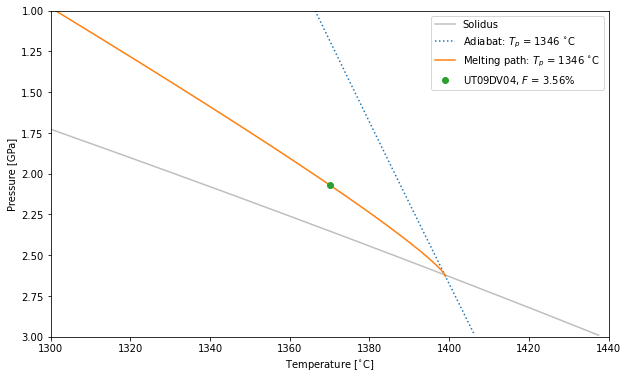

In [13]:
# Initialise
plt.figure(figsize=(10,6))

# Set up pressure array.
P = np.arange(1., 3., 0.01)

# Plot the solidus.
plt.plot(lz.TSolidus(P), P, c="0.75", label="Solidus")

# Plot an adiabat corresponding to the best-fitting potential temperature
adiabat_label = r"Adiabat: $T_p$ = %i $^{\circ}$C" % s.individual_potential_temperatures.iloc[0]['Tp']
plt.plot(
    mantle.adiabat(
        P, 
        s.individual_potential_temperatures.iloc[0]['Tp']), 
    P, ":", label=adiabat_label)
    
# Plot melt path corresponding to best-fitting potential temperature
melt_label = r"Melting path: $T_p$ = %i $^{\circ}$C" % s.individual_potential_temperatures.iloc[0]['Tp']
plt.plot(
    s.individual_potential_temperatures.iloc[0].path.T, 
    s.individual_potential_temperatures.iloc[0].path.P,
    label=melt_label)
    
# Plot our sample!
sample_label = r"UT09DV04, $F$ = %.2f%%" % (s.individual_potential_temperatures.iloc[0]['F']*100.)
plt.plot(s.PT['T'], s.PT['P'], "o", label=sample_label)

# Do some formatting and reveal
plt.xlabel(r"Temperature [$^{\circ}$C]")
plt.ylabel(r"Pressure [GPa]")
plt.xlim(1300., 1440.)
plt.ylim(1., 3.)
plt.legend()
plt.gca().invert_yaxis()
plt.show()